## PROJECT-2
### DAPR-30_Shirshova_Anna

#### ЦЕЛИ:

1. Изучить влияет ли обучение на скорость прохождения этапов игры. 

2. Посмотреть, зависит ли вероятность оплаты вопросов от количества обучений.

3. Определить, понятно ли пользователям, как работать с приложением.

#### ЗАДАЧИ:

1. Проверить, отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение. Насколько обучение сокращает время прохождения этапов?

2. Посмотреть, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. Нужно доказать, что успешное обучение само по себе влияет на оплату, и без разницы, каким этапом оно шло.

3. Определить, как часто пользователи начинают обучение после того, как они выбрали уровень сложности? 

!! Проверку произвести на основе данных пользователей, которые зарегистрировались в 2018 году (с 1 января по 31 декабря 2018 года включительно).

#### Исследование и предобработка данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd             
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')  #Отключить сторонние предупреждения

In [2]:
df=pd.read_csv('Events.csv')    #Исходный датафрейм с данными о событиях
df.head()

,id,event_type,selected_level,start_time,tutorial_id,user_id
0,28903,registration,NaN,2016-05-11T23:40:55,NaN,12583
1,28904,registration,NaN,2016-05-11T23:49:58,NaN,12584
2,28905,registration,NaN,2016-05-12T00:53:07,NaN,12585
3,28906,tutorial_start,NaN,2016-05-12T01:32:20,17562.0,12585
4,28907,tutorial_finish,NaN,2016-05-12T01:34:53,17562.0,12585


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252334 entries, 0 to 252333
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              252334 non-null  int64  
 1   event_type      252334 non-null  object 
 2   selected_level  31086 non-null   object 
 3   start_time      252334 non-null  object 
 4   tutorial_id     125103 non-null  float64
 5   user_id         252334 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.6+ MB


In [4]:
df.describe()

,id,tutorial_id,user_id
count,252334.00000,125103.000000,252334.000000
mean,155069.50000,51815.675364,50003.098790
std,72842.69575,19792.496704,21586.690775
min,28903.00000,17562.000000,12583.000000
25%,91986.25000,34666.000000,31302.000000
50%,155069.50000,51794.000000,49983.000000
75%,218152.75000,68961.500000,68670.000000
max,281236.00000,86127.000000,87490.000000


In [5]:
pdf=pd.read_csv('purchase.xls')     #Исходный датафрейм с данными об оплатах
pdf.head()

,id,user_id,event_datetime,amount
0,15674,12584,2016-05-12T10:34:16,100
1,15675,12985,2016-05-13T08:25:56,50
2,15676,12828,2016-05-13T16:33:46,50
3,15677,12598,2016-05-14T01:09:37,150
4,15678,13037,2016-05-14T01:24:46,100


In [6]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5956 non-null   int64 
 1   user_id         5956 non-null   int64 
 2   event_datetime  5956 non-null   object
 3   amount          5956 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 186.2+ KB


In [7]:
pdf.describe()

,id,user_id,amount
count,5956.000000,5956.000000,5956.000000
mean,18651.500000,50224.943251,108.919577
std,1719.493433,21458.351127,55.786902
min,15674.000000,12584.000000,25.000000
25%,17162.750000,31701.500000,50.000000
50%,18651.500000,50343.500000,100.000000
75%,20140.250000,68584.500000,150.000000
max,21629.000000,87480.000000,350.000000


##### Извлекаем данные по пользователям, которые зарегистрировались в 2018 году и исследуем их

In [8]:
reg_df_2018=(df['start_time']>='2018-01-01')&(df['start_time']<'2019-01-01')&(df['event_type']=='registration')
###Выбираем из данных только тех, кто зарегистрировался в 2018 году

registered=df[reg_df_2018]['user_id'].to_list()
### Создаем список пользователей, зарегистрировнных в 2018 году

events_2018=df[df['user_id'].isin(registered)]
### Создаем датафрейм из всех столбцов, которые были в нашем изначальном файле, но только с пользователями, которые
### зарегистрировались в 2018 году

purchase_2018=pdf[pdf['user_id'].isin(registered)]
### Создаем датафрейм с данными об оплатах, которые совершают пользователи, зарегистрированные в 2018 году

In [9]:
#Датафрейм с данными о событиях (пользователи, зарегистрированные в 2018)
events_2018.head(10)

,id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01T03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01T04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01T08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01T11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01T13:28:07,NaN,27836
51410,80313,registration,NaN,2018-01-01T14:08:40,NaN,27837
51411,80314,registration,NaN,2018-01-01T14:42:58,NaN,27838
51412,80315,tutorial_start,NaN,2018-01-01T14:54:40,31505.0,27836
51413,80316,tutorial_start,NaN,2018-01-01T15:00:51,31506.0,27835
51414,80317,tutorial_finish,NaN,2018-01-01T15:06:15,31506.0,27835


In [10]:
events_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66959 entries, 51405 to 118364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              66959 non-null  int64  
 1   event_type      66959 non-null  object 
 2   selected_level  8342 non-null   object 
 3   start_time      66959 non-null  object 
 4   tutorial_id     32954 non-null  float64
 5   user_id         66959 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.6+ MB


In [11]:
#Посмотрим какие уникальные события есть в колонке event_type
events_2018['event_type'].unique()

array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'pack_choice'], dtype=object)

In [12]:
#Кол-во уникальных пользователей, которые прошли регистрацию
user=events_2018['user_id'].nunique()
user

19926

In [13]:
#Количество событий tutorial_start
events_2018[events_2018['event_type']=='tutorial_start']['user_id'].count()

18050

In [14]:
# Количество уникальных пользователей, которые приступили к обучению
events_2018[events_2018['event_type']=='tutorial_start']['user_id'].nunique() 

# !!! Многие начинали обучение больше одного раза

11858

In [15]:
#Количество событий tutorial_finish
events_2018[events_2018['event_type']=='tutorial_finish']['user_id'].count()

14904

In [16]:
# Количество уникальных пользователей, которые завершили обучение
events_2018[events_2018['event_type']=='tutorial_finish']['user_id'].nunique()

10250

In [17]:
#Количество событий level_choice
events_2018[events_2018['event_type']=='level_choice']['user_id'].count()

8342

In [18]:
#Количество уникальных пользователей, которые приступили к выбору уровня сложности
events_2018[events_2018['event_type']=='level_choice']['user_id'].nunique()

8342

In [19]:
#Количество событий pack_choice
events_2018[events_2018['event_type']=='pack_choice']['user_id'].count()

5737

In [20]:
#Количество уникальных пользователей, которые приступили к выбору бесплатного пакета вопросов
events_2018[events_2018['event_type']=='pack_choice']['user_id'].nunique()

5737

In [21]:
#Датафрейм с данными об оплатах (пользователи, зарегистрированные в 2018)
purchase_2018.head(10)

,id,user_id,event_datetime,amount
1171,16845,27845,2018-01-03T18:53:43,100
1172,16846,27865,2018-01-04T14:46:10,250
1174,16848,27911,2018-01-07T08:19:12,50
1175,16849,27910,2018-01-07T12:11:34,100
1176,16850,27940,2018-01-07T13:16:41,200
1177,16851,27965,2018-01-07T22:55:33,100
1178,16852,27981,2018-01-07T23:20:25,50
1179,16853,27969,2018-01-08T01:18:23,100
1180,16854,27884,2018-01-08T19:37:34,150
1181,16855,27977,2018-01-09T14:09:18,25


In [22]:
purchase_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1171 to 2778
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1600 non-null   int64 
 1   user_id         1600 non-null   int64 
 2   event_datetime  1600 non-null   object
 3   amount          1600 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.5+ KB


In [23]:
len(purchase_2018['user_id'].unique())  #В данном датафрейме все user_id уникальные

1600

In [24]:
# Преобразуем данные строкового типа в datetime
events_2018['start_time'] = pd.to_datetime(events_2018['start_time'])
purchase_2018['event_datetime'] = pd.to_datetime(purchase_2018['event_datetime']) 

##### Объединяем датафреймы с событиями и оплатами, чтобы анализировать все события в рамках одной структуры данных.

In [25]:
# Добавим в датафрейм с оплатами столбец, который будет содержать только значение purchase, чтобы в объединенном
# датафрейме выделить события оплаты
purchase_2018['event_type']='purchase'

#Перед объединением таблиц переименуем столбцы 'id', т.к.они имеют разные значения (в табл. с событиями - идентификатор
# события, в таблице с оплатами - идентификатор оплаты) и в таблицк с событиями переименуем столбец start_time
events_2018=events_2018.rename(columns={'id':'event_id','start_time':'event_datetime'})
purchase_2018=purchase_2018.rename(columns={'id':'purchase_id'})

In [92]:
# Объединим датафреймы с событиями и оплатами
total_events=pd.concat([events_2018, purchase_2018], sort=False)
total_events

,event_id,event_type,selected_level,event_datetime,tutorial_id,user_id,purchase_id,amount
51405,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
51406,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
51407,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
51408,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
51409,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN
...,...,...,...,...,...,...,...,...
2767,NaN,purchase,NaN,2019-01-02 03:48:19,NaN,47498,18441.0,100.0
2768,NaN,purchase,NaN,2019-01-02 23:26:26,NaN,47647,18442.0,150.0
2769,NaN,purchase,NaN,2019-01-03 00:36:36,NaN,47554,18443.0,50.0
2774,NaN,purchase,NaN,2019-01-04 12:51:41,NaN,47742,18448.0,50.0


In [27]:
total_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68559 entries, 51405 to 2778
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        66959 non-null  float64       
 1   event_type      68559 non-null  object        
 2   selected_level  8342 non-null   object        
 3   event_datetime  68559 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         68559 non-null  int64         
 6   purchase_id     1600 non-null   float64       
 7   amount          1600 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.7+ MB


In [28]:
# Cбросим индексы объединенного датафрейма и отсортируем все события по возрастанию времени с помощью sort_values():
total_events=total_events.reset_index(drop=True).sort_values('event_datetime')
total_events.head()

,event_id,event_type,selected_level,event_datetime,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN


### ЗАДАЧА №1
Проверить, отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение. Насколько обучение сокращает время прохождения этапов?

#### Разделим пользователей на 3 группы:
    . прошли обучение (users_finished_tutorial)
    . начали обучение, но не закончили (users_not_finished_tutorial_but_started)
    . не начинали обучение (users_not_started_tutorial)

#### users_finished_tutorial (прошли обучение)

In [29]:
# Создим датафрейм с пользователями, которые прошли обучение
users_finished_tutorial=total_events[total_events['event_type']=='tutorial_finish']

#Посчитаем среднее количество завершений обучения на одного пользователя
users_finished_tutorial['user_id'].value_counts().mean()

# Вывод: есть пользователи, которые проходили обучение несколько раз


1.4540487804878048

In [30]:
users_finished_tutorial=users_finished_tutorial['user_id'].unique()
len(users_finished_tutorial)

10250

In [31]:
# Создадим множество пользователей, которые завершили обучение 
set_users_finished_tutorial=set(users_finished_tutorial)

#### users_not_finished_tutorial_but_started (начали обучение, но не завершили)

Это будут пользователи, у которых есть событие tutorial_start, но нет события tutorial_finish. Проще всего сначала найти пользователей, у которых есть событие tutorial_start, а после убрать из списка таких пользователей, у которых есть событие tutorial_finish. В этом нам сильно поможет работа со множествами:

In [32]:
# Создадим датафрейм с пользователями, которые начали обучение
users_started_tutorial=total_events[total_events['event_type']=='tutorial_start']

#Посчитаем среднее количество начал обучения на одного пользователя
users_started_tutorial['user_id'].value_counts().mean()
#Вывод: есть пользователи, которые начинали обучение несколько раз

1.522179119581717

In [33]:
#Выделим уникальных пользователей, которые начинали обучение
users_started_tutorial=users_started_tutorial['user_id'].unique()
len(users_started_tutorial)

11858

In [34]:
#Создадим множество пользователей, которые начали обучение
set_users_started_tutorial=set(users_started_tutorial)

In [35]:
#Посчитаем пользователей, которые начали, но не закончили обучение, удалив из множества пользователей, 
# которые завершили обучение
set_users_not_finished_tutorial_but_started = set_users_started_tutorial.difference(set_users_finished_tutorial)
len(set_users_not_finished_tutorial_but_started) 

1608

#### users_not_started_tutorial (не начинали обучение)

In [36]:
all_users=total_events['user_id'].unique()
len(all_users)

19926

In [37]:
#Создадим множество всех пользователей
set_all_users=set(all_users)

#Выделим множество пользователей, которые не начинали обучение, удалив тех, кто начинал обучение
set_users_not_started_tutorial=set_all_users.difference(set_users_started_tutorial) #Выбросим тех, кто приступал к обучению
len(set_users_not_started_tutorial)

8068

In [38]:
#Проверим, правильно ли мы произвели расчет
len(set_all_users)==(len(set_users_not_started_tutorial)+len(set_users_finished_tutorial)+\
                     len(set_users_not_finished_tutorial_but_started))

True

   #### Создадим сводную таблицу для 1-ой группы пользователе1 (users_finished_tutorial (завершивших обучение)) и посчитаем время между прохождением этапов игры

In [39]:
pivot_table_1 = total_events[total_events['user_id'].isin(set_users_finished_tutorial)].pivot_table( index='user_id',\
                                        columns='event_type', values='event_datetime', aggfunc='min')
pivot_table_1.reset_index(drop=True)

event_type,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
0,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
1,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
2,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
3,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40
4,2018-01-01 22:37:50,2018-01-01 22:42:54,NaT,2018-01-01 18:24:01,2018-01-01 19:16:32,2018-01-01 19:11:36
...,...,...,...,...,...,...
10245,NaT,NaT,NaT,2018-12-31 03:29:04,2018-12-31 04:14:21,2018-12-31 04:11:31
10246,NaT,NaT,NaT,2018-12-31 13:55:01,2018-12-31 19:39:34,2018-12-31 19:38:14
10247,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56
10248,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14


In [40]:
pivot_table_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10250 entries, 27833 to 47756
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   level_choice     7501 non-null   datetime64[ns]
 1   pack_choice      5176 non-null   datetime64[ns]
 2   purchase         1447 non-null   datetime64[ns]
 3   registration     10250 non-null  datetime64[ns]
 4   tutorial_finish  10250 non-null  datetime64[ns]
 5   tutorial_start   10250 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 560.5 KB


In [41]:
# Рассчитаем среднюю разницу во времени между этапами игры для users_finished_tutorial (завершивших обучение)

# Разница м/у регистрацией и выбором уровня сложности 
difference_in_time_reg_level_1=(pivot_table_1['level_choice']-pivot_table_1['registration']).mean()  

# Разница м/у выбором уровня сложности и выбором пакета б/пл вопросов 
difference_in_time_level_pack_1=(pivot_table_1['pack_choice']-pivot_table_1['level_choice']).mean() 

# Разница м/у выбором пакета б/пл вопросов и оплатой 
difference_in_time_pack_purchase_1=(pivot_table_1['purchase']-pivot_table_1['pack_choice']).mean()

# Разница м/у регистрацией и оплатой 
difference_in_time_reg_purchase_1=(pivot_table_1['purchase']-pivot_table_1['registration']).mean()

print('Среднее время между регистрацией и выбором уровня сложности в группе пользователей, которые прошли обучение составляет - {}'.format(difference_in_time_reg_level_1))
print('Среднее время между выбором уровня сложности и выбором бесплатного пакета вопросов в группе пользователей, которые прошли обучение составляет - {}'.format(difference_in_time_level_pack_1))
print('Среднее время между выбором бесплатного пакета вопросов и оплатой в группе пользователей, которые прошли обучение составляет - {}'.format(difference_in_time_pack_purchase_1))
print('Среднее время между регистрацией и оплатой в группе пользователей, которые прошли обучение составляет - {}'.format(difference_in_time_reg_purchase_1))

Среднее время между регистрацией и выбором уровня сложности в группе пользователей, которые прошли обучение составляет - 0 days 07:05:36.854819357
Среднее время между выбором уровня сложности и выбором бесплатного пакета вопросов в группе пользователей, которые прошли обучение составляет - 0 days 00:05:18.146058732
Среднее время между выбором бесплатного пакета вопросов и оплатой в группе пользователей, которые прошли обучение составляет - 3 days 17:17:59.641326883
Среднее время между регистрацией и оплатой в группе пользователей, которые прошли обучение составляет - 4 days 00:30:03.247408431


In [42]:
# Добавим в таблицу с пользователями 1-й группы столбцы с разницой во времени между этапами прохождения игры
# и столбец tutorial, в к-ом отметим к какой группе относятся пользователи (необходимо для будущей сводной таблицы)¶

pivot_table_1['difference_in_time_reg_level']=pivot_table_1['level_choice']-pivot_table_1['registration']
pivot_table_1['difference_in_time_level_pack']=pivot_table_1['pack_choice']-pivot_table_1['level_choice']
pivot_table_1['difference_in_time_pack_purchase']=pivot_table_1['purchase']-pivot_table_1['pack_choice']
pivot_table_1['difference_in_time_reg_purchase']=pivot_table_1['purchase']-pivot_table_1['registration']
pivot_table_1['tutorial']='Finished'
pivot_table_1.head()

event_type,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,difference_in_time_reg_level,difference_in_time_level_pack,difference_in_time_pack_purchase,difference_in_time_reg_purchase,tutorial
user_id,,,,,,,,,,,
27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,NaT,NaT,NaT,NaT,Finished
27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,NaT,NaT,NaT,NaT,Finished
27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,0 days 08:42:35,0 days 00:01:21,NaT,NaT,Finished
27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,NaT,NaT,NaT,NaT,Finished
27839,2018-01-01 22:37:50,2018-01-01 22:42:54,NaT,2018-01-01 18:24:01,2018-01-01 19:16:32,2018-01-01 19:11:36,0 days 04:13:49,0 days 00:05:04,NaT,NaT,Finished


#### Создадим сводную таблицу для 2 группы пользователей (users_not_finished_tutorial_but_started (начали обучение, но не завершили)) и посчитаем время между прохождением этапов

In [43]:
pivot_table_2=total_events[total_events['user_id'].isin(set_users_not_finished_tutorial_but_started)].pivot_table\
(columns='event_type', index='user_id', values='event_datetime', aggfunc='min')
pivot_table_2.reset_index(drop=True)

event_type,level_choice,pack_choice,purchase,registration,tutorial_start
0,2018-01-02 05:18:42,NaT,NaT,2018-01-01 20:53:21,2018-01-02 02:07:07
1,2018-01-03 08:31:35,2018-01-03 08:33:35,NaT,2018-01-02 21:18:21,2018-01-03 04:36:55
2,NaT,NaT,NaT,2018-01-02 21:25:30,2018-01-03 07:18:57
3,2018-01-03 01:11:45,NaT,NaT,2018-01-02 21:30:27,2018-01-02 21:37:44
4,2018-01-04 05:56:32,2018-01-04 06:03:20,2018-01-04 14:46:10,2018-01-03 11:14:57,2018-01-03 23:30:17
...,...,...,...,...,...
1603,NaT,NaT,NaT,2018-12-27 18:49:35,2018-12-27 22:49:43
1604,NaT,NaT,NaT,2018-12-28 04:54:41,2018-12-28 09:35:33
1605,NaT,NaT,NaT,2018-12-28 21:35:31,2018-12-28 23:59:07
1606,2018-12-29 19:54:03,NaT,NaT,2018-12-29 06:21:41,2018-12-29 16:29:49


In [44]:
pivot_table_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 27840 to 47725
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   level_choice    743 non-null    datetime64[ns]
 1   pack_choice     487 non-null    datetime64[ns]
 2   purchase        131 non-null    datetime64[ns]
 3   registration    1608 non-null   datetime64[ns]
 4   tutorial_start  1608 non-null   datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 75.4 KB


In [45]:
# Рассчитаем разницу во времени между этапами игры для 
# users_not_finished_tutorial_but_started (начали обучение, но не завершили)

# Разница м/у регистрацией и выбором уровня сложности 
difference_in_time_reg_level_2=(pivot_table_2['level_choice']-pivot_table_2['registration']).mean() 

# Разница м/у выбором уровня сложности и выбором пакета б/пл вопросов 
difference_in_time_level_pack_2=(pivot_table_2['pack_choice']-pivot_table_2['level_choice']).mean() 

# Разница м/у выбором пакета б/пл вопросов и оплатой
difference_in_time_pack_purchase_2=(pivot_table_2['purchase']-pivot_table_2['pack_choice']).mean()

# Разница м/у регистрацией и оплатой
difference_in_time_reg_purchase_2=(pivot_table_2['purchase']-pivot_table_2['registration']).mean()

print('Среднее время между регистрацией и выбором уровня сложности в группе пользователей, которые начали, но не закончили обучение составляет - {}'.format(difference_in_time_reg_level_2))
print('Среднее время между выбором уровня сложности и выбором бесплатного пакета вопросов в группе пользователей, которые начали, но не закончили обучение составляет - {}'.format(difference_in_time_level_pack_2))
print('Среднее время между выбором бесплатного пакета вопросов и оплатой в группе пользователей, которые начали, но не закончили обучение составляет - {}'.format(difference_in_time_pack_purchase_2))
print('Среднее время между регистрацией и оплатой в группе пользователей, которые начали, но не закончили обучение составляет - {}'.format(difference_in_time_reg_purchase_2))

Среднее время между регистрацией и выбором уровня сложности в группе пользователей, которые начали, но не закончили обучение составляет - 0 days 08:12:57.551816958
Среднее время между выбором уровня сложности и выбором бесплатного пакета вопросов в группе пользователей, которые начали, но не закончили обучение составляет - 0 days 00:05:05.295687885
Среднее время между выбором бесплатного пакета вопросов и оплатой в группе пользователей, которые начали, но не закончили обучение составляет - 3 days 21:14:46.908396946
Среднее время между регистрацией и оплатой в группе пользователей, которые начали, но не закончили обучение составляет - 4 days 05:32:53.213740458


In [46]:
# Добавим в таблицу с пользователями 2-й группы столбцы с разницой во времени между этапами прохождения игры
# и столбец tutorial, в к-ом отметим к какой группе относятся пользователи (необходимо для будущей сводной таблицы)

pivot_table_2['difference_in_time_reg_level']=pivot_table_2['level_choice']-pivot_table_2['registration']
pivot_table_2['difference_in_time_level_pack']=pivot_table_2['pack_choice']-pivot_table_2['level_choice']
pivot_table_2['difference_in_time_pack_purchase']=pivot_table_2['purchase']-pivot_table_2['pack_choice']
pivot_table_2['difference_in_time_reg_purchase']=pivot_table_2['purchase']-pivot_table_2['registration']
pivot_table_2['tutorial']='Not_finished_but_started'
pivot_table_2.head()

event_type,level_choice,pack_choice,purchase,registration,tutorial_start,difference_in_time_reg_level,difference_in_time_level_pack,difference_in_time_pack_purchase,difference_in_time_reg_purchase,tutorial
user_id,,,,,,,,,,
27840,2018-01-02 05:18:42,NaT,NaT,2018-01-01 20:53:21,2018-01-02 02:07:07,0 days 08:25:21,NaT,NaT,NaT,Not_finished_but_started
27856,2018-01-03 08:31:35,2018-01-03 08:33:35,NaT,2018-01-02 21:18:21,2018-01-03 04:36:55,0 days 11:13:14,0 days 00:02:00,NaT,NaT,Not_finished_but_started
27857,NaT,NaT,NaT,2018-01-02 21:25:30,2018-01-03 07:18:57,NaT,NaT,NaT,NaT,Not_finished_but_started
27859,2018-01-03 01:11:45,NaT,NaT,2018-01-02 21:30:27,2018-01-02 21:37:44,0 days 03:41:18,NaT,NaT,NaT,Not_finished_but_started
27865,2018-01-04 05:56:32,2018-01-04 06:03:20,2018-01-04 14:46:10,2018-01-03 11:14:57,2018-01-03 23:30:17,0 days 18:41:35,0 days 00:06:48,0 days 08:42:50,1 days 03:31:13,Not_finished_but_started


#### Создадим сводную таблицу для 3 группы пользователей (users_not_started_tutorial (не начинали обучение)) и посчитаем время между прохождением этапов

In [47]:
pivot_table_3=total_events.loc[total_events['user_id'].isin(set_users_not_started_tutorial)].\
pivot_table(columns='event_type', index='user_id', values='event_datetime', aggfunc='min')
pivot_table_3.reset_index(drop=True)

event_type,level_choice,pack_choice,purchase,registration
0,NaT,NaT,NaT,2018-01-01 03:48:40
1,NaT,NaT,NaT,2018-01-01 14:08:40
2,NaT,NaT,NaT,2018-01-01 14:42:58
3,NaT,NaT,NaT,2018-01-02 00:13:22
4,NaT,NaT,NaT,2018-01-02 06:05:02
...,...,...,...,...
8063,NaT,NaT,NaT,2018-12-31 12:03:59
8064,NaT,NaT,NaT,2018-12-31 13:42:40
8065,NaT,NaT,NaT,2018-12-31 18:49:30
8066,NaT,NaT,NaT,2018-12-31 19:14:08


In [48]:
#Рассчитаем среднюю разницу во времени между этапами игры для users_not_started_tutorial (не начинали обучение)

# Разница м/у регистрацией и выбором уровня сложности
difference_in_time_reg_level_3=(pivot_table_3['level_choice']-pivot_table_3['registration']).mean() 

# Разница м/у выбором уровня сложности и выбором пакета б/пл вопросов
difference_in_time_level_pack_3=(pivot_table_3['pack_choice']-pivot_table_3['level_choice']).mean()

# Разница м/у выбором пакета б/пл вопросов и оплатой
difference_in_time_pack_purchase_3=(pivot_table_3['purchase']-pivot_table_3['pack_choice']).mean()

# Разница м/у регистрацией и оплатой
difference_in_time_reg_purchase_3=(pivot_table_3['purchase']-pivot_table_3['registration']).mean()

print('Среднее время между регистрацией и выбором уровня сложности в группе пользователей, которые не начинали обучение составляет - {}'.format(difference_in_time_reg_level_3))
print('Среднее время между выбором уровня сложности и выбором бесплатного пакета вопросов в группе пользователей, которые не начинали обучение составляет - {}'.format(difference_in_time_level_pack_3))
print('Среднее время между выбором бесплатного пакета вопросов и оплатой в группе пользователей, которые не начинали обучение составляет - {}'.format(difference_in_time_pack_purchase_3))
print('Среднее время между регистрацией и оплатой в группе пользователей, которые не начинали обучение составляет - {}'.format(difference_in_time_reg_purchase_3))

Среднее время между регистрацией и выбором уровня сложности в группе пользователей, которые не начинали обучение составляет - 0 days 05:15:33.122448979
Среднее время между выбором уровня сложности и выбором бесплатного пакета вопросов в группе пользователей, которые не начинали обучение составляет - 0 days 00:05:23.824324324
Среднее время между выбором бесплатного пакета вопросов и оплатой в группе пользователей, которые не начинали обучение составляет - 4 days 04:49:33.590909090
Среднее время между регистрацией и оплатой в группе пользователей, которые не начинали обучение составляет - 4 days 09:06:01.909090909


In [49]:
# Добавим в таблицу с пользователями 3-й группы столбцы с разницой во времени между этапами прохождения игры
# и столбец tutorial, в к-ом отметим к какой группе относятся пользователи (необходимо для будущей сводной таблицы)

pivot_table_3['difference_in_time_reg_level']=pivot_table_3['level_choice']-pivot_table_3['registration']
pivot_table_3['difference_in_time_level_pack']=pivot_table_3['pack_choice']-pivot_table_3['level_choice']
pivot_table_3['difference_in_time_pack_purchase']=pivot_table_3['purchase']-pivot_table_3['pack_choice']
pivot_table_3['difference_in_time_reg_purchase']=pivot_table_3['purchase']-pivot_table_3['registration']
pivot_table_3['tutorial']='Not_started'
pivot_table_3.head()

event_type,level_choice,pack_choice,purchase,registration,difference_in_time_reg_level,difference_in_time_level_pack,difference_in_time_pack_purchase,difference_in_time_reg_purchase,tutorial
user_id,,,,,,,,,
27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,NaT,NaT,Not_started
27837,NaT,NaT,NaT,2018-01-01 14:08:40,NaT,NaT,NaT,NaT,Not_started
27838,NaT,NaT,NaT,2018-01-01 14:42:58,NaT,NaT,NaT,NaT,Not_started
27844,NaT,NaT,NaT,2018-01-02 00:13:22,NaT,NaT,NaT,NaT,Not_started
27848,NaT,NaT,NaT,2018-01-02 06:05:02,NaT,NaT,NaT,NaT,Not_started


#### Объединим таблицы, чтобы построить график

In [50]:
#Объединим сводные таблицы
total_pivot_table=pd.concat([pivot_table_1, pivot_table_2, pivot_table_3], sort=False).reset_index()
total_pivot_table  

,user_id,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,difference_in_time_reg_level,difference_in_time_level_pack,difference_in_time_pack_purchase,difference_in_time_reg_purchase,tutorial
0,27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,NaT,NaT,NaT,NaT,Finished
1,27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,NaT,NaT,NaT,NaT,Finished
2,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,0 days 08:42:35,0 days 00:01:21,NaT,NaT,Finished
3,27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,NaT,NaT,NaT,NaT,Finished
4,27839,2018-01-01 22:37:50,2018-01-01 22:42:54,NaT,2018-01-01 18:24:01,2018-01-01 19:16:32,2018-01-01 19:11:36,0 days 04:13:49,0 days 00:05:04,NaT,NaT,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...
19921,47749,NaT,NaT,NaT,2018-12-31 12:03:59,NaT,NaT,NaT,NaT,NaT,NaT,Not_started
19922,47750,NaT,NaT,NaT,2018-12-31 13:42:40,NaT,NaT,NaT,NaT,NaT,NaT,Not_started
19923,47752,NaT,NaT,NaT,2018-12-31 18:49:30,NaT,NaT,NaT,NaT,NaT,NaT,Not_started
19924,47754,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT,NaT,NaT,NaT,NaT,Not_started


In [51]:
# Перевeдeм даты в другой формат
total_pivot_table['difference_in_time_reg_level']=total_pivot_table['difference_in_time_reg_level']/\
pd.Timedelta('1H') # в часах
total_pivot_table['difference_in_time_level_pack']=total_pivot_table['difference_in_time_level_pack']/\
pd.Timedelta('1M') # в минутах
total_pivot_table['difference_in_time_pack_purchase']=total_pivot_table['difference_in_time_pack_purchase']/\
pd.Timedelta('1D') # в днях
total_pivot_table['difference_in_time_reg_purchase']=total_pivot_table['difference_in_time_reg_purchase']/\
pd.Timedelta('1D') # в днях

In [52]:
#Сгруппируем данные по группам пользователей и оставим только нужные столбцы
total_pivot_table_group=total_pivot_table[['difference_in_time_reg_level','difference_in_time_level_pack',\
'difference_in_time_pack_purchase', 'difference_in_time_reg_purchase', 'tutorial']].groupby(['tutorial'],\
as_index=False).mean()
total_pivot_table_group

,tutorial,difference_in_time_reg_level,difference_in_time_level_pack,difference_in_time_pack_purchase,difference_in_time_reg_purchase
0,Finished,7.093571,5.302434,3.720829,4.020871
1,Not_finished_but_started,8.215987,5.088261,3.885265,4.231171
2,Not_started,5.259201,5.397072,4.201083,4.379189


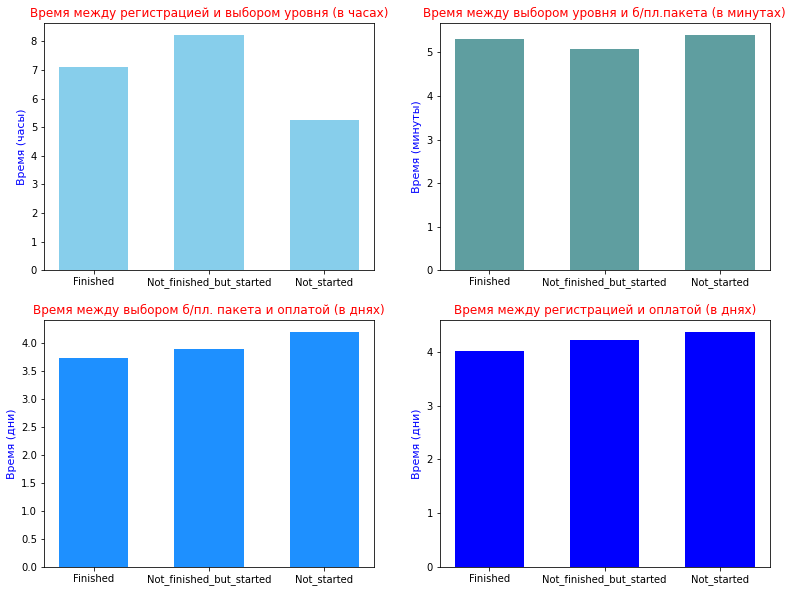

In [53]:
fig, axes=plt.subplots(2,2, figsize=(13,10))

axes[0][0].bar(x=total_pivot_table_group['tutorial'], height=total_pivot_table_group['difference_in_time_reg_level'],
               color='skyblue', width=0.6)
axes[0][0].set_title('Время между регистрацией и выбором уровня (в часах)', color='red', fontsize=12)
axes[0][0].set_ylabel('Время (часы)', color='blue', fontsize=11)

axes[0][1].bar(x=total_pivot_table_group['tutorial'], height=total_pivot_table_group['difference_in_time_level_pack'],
               color='cadetblue', width=0.6)
axes[0][1].set_title('Время между выбором уровня и б/пл.пакета (в минутах)',color='red', fontsize=12)
axes[0][1].set_ylabel('Время (минуты)', color='blue', fontsize=11)

axes[1][0].bar(x=total_pivot_table_group['tutorial'], height=total_pivot_table_group['difference_in_time_pack_purchase'],
               color='dodgerblue', width=0.6)
axes[1][0].set_title('Время между выбором б/пл. пакета и оплатой (в днях)', color='red', fontsize=12)
axes[1][0].set_ylabel('Время (дни)', color='blue', fontsize=11)
               
axes[1][1].bar(x=total_pivot_table_group['tutorial'], height=total_pivot_table_group['difference_in_time_reg_purchase'],
               color='blue', width=0.6)
axes[1][1].set_title('Время между регистрацией и оплатой (в днях)',color='red', fontsize=12)
axes[1][1].set_ylabel('Время (дни)', color='blue', fontsize=11)

plt.show()

### ВЫВОДЫ по задаче №1:
- Меньше всего времени между регистрацией и выбором уровня сложности затрачивают пользователи, которые не приступали к обучению (в среднем -  5 часов 15 минут) - это почти на 2 часа меньше, чем пользователи, прошедшие обучение и почти на 3 часа меньше, чем пользователи начавшие, но не завершившие обучение. Скорее всего это связано с тем, что они не тратят время на обучение. Разница в затраченном времени между пользователями завершившими обучение и начавшими, но не завершившими незначительная  (чуть больше часа), причем пользователи завершившие обучение в среднем тратят меньше времени, чем те, которые его не завершили.

        Среднее время между прохождением этапов регистрации и выбора уровня сложности:
        -завершили обучение - 7 ч. 5 мин.
        -начали, но не завершили обучение - 8 ч. 12 мин.
        -не приступали к обучению - 5 ч. 15 мин.
        
- Время между выбором уровня сложности и выбором бесплатного пакета вопросов у разных групп пользователей отличается незначительно (в среднем от 5 минут 5 секунд до 5 минут 23 секунд), причем меньше всего времени тратят пользователи, которые начали, но не завершили обучение. Это говорит о том, что обучение не влияет на время между этими этапами.

        Среднее время между прохождением этапов выбора уровня сложности и выбора бесплатного пакета вопросов:
        -завершили обучение - 5 мин. 18 сек.
        -начали, но не завершили обучение - 5 мин. 5 сек
        -не приступали к обучению - 5 мин. 23 сек.
        
- Больше всего времени между выбором бесплатного пакета вопросов и оплатой проходит у пользователей, которые не приступали обучения, меньше всего - у пользователей, которые завершили обучение. Можно предположить, что обучение сокращает время между этапами выбора бесплатного пакета вопросов и оплатой.

        Среднее время между прохождением этапов выбора бесплатного пакета вопросов и оплатой:
        -завершили обучение - 3 дня 17 ч. 17 мин.
        -начали, но не завершили обучение -3 дня 21 ч. 14 мин.
        -не приступали к обучению - 4 дня 4 ч. 49 мин.
        
- Больше всего времени между этапом регистрации и оплатой проходит у пользователей, которые не приступали обучения, меньше всего - у пользователей, которые завершили обучение. Можно сделать вывод, что обучение сокращает время прохождения этапов игры.
        Среднее время между прохождением этапов регистрации и оплатой:
        -завершили обучение - 4 дня 0 ч. 30 мин.
        -начали, но не завершили обучение - 4 дня 5 ч. 32 мин.
        -не приступали к обучению - 4 дня 9 ч. 6 мин.
 

### Задача №2 
Посмотреть, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. Нужно доказать, что успешное обучение само по себе влияет на оплату, и без разницы, каким этапом оно шло.

#### Разделим пользователей на 2 группы :
    . прошли обучение (users_finished_tutorial)
    . начали обучение, но не закончили (users_not_finished_tutorial_but_started)

#### Расчет зависимости вероятности оплаты вопросов от количества обучений в группe 1 (users_finished_tutorial (завершивших обучение))

In [54]:
#Посчитаем сколько у каждого пользователя оконченных обучений, переименуем столбец event_type
users_count_finished_tutorial = total_events[total_events['user_id'].isin(users_finished_tutorial)].groupby\
(['user_id'])['event_type'].apply(lambda x: (x=='tutorial_finish').sum()).reset_index().\
rename(columns={"event_type": "tutorial_finished_count"})
users_count_finished_tutorial

,user_id,tutorial_finished_count
0,27833,1
1,27834,1
2,27835,1
3,27836,1
4,27839,1
...,...,...
10245,47748,1
10246,47751,1
10247,47753,1
10248,47755,1


In [55]:
#Посмотрим какие уникальные значения есть в колонке tutorial_finished_count
users_count_finished_tutorial['tutorial_finished_count'].unique()


array([1, 2, 5, 8, 4, 3, 7, 6, 9], dtype=int64)

In [56]:
# Создадим датафрейм, в котором посчитаем количество оплат у каждого пользователя 
users_count_purchase= total_events.groupby(['user_id'])\
['event_type'].apply(lambda x: (x=='purchase').sum()).reset_index().\
rename(columns={"event_type": "purchase_count"}) 
users_count_purchase                     

,user_id,purchase_count
0,27832,0
1,27833,0
2,27834,0
3,27835,0
4,27836,0
...,...,...
19921,47753,0
19922,47754,0
19923,47755,0
19924,47756,0


In [57]:
#Объединим датафрейм с колич-ом оконченных обучений и кол-ом оплат для 1 группы пользователей, 
# завершивших обучение
users_count_finished_tutoriale_purchase=users_count_finished_tutorial.\
merge(users_count_purchase, on="user_id", how='inner')
users_count_finished_tutoriale_purchase

,user_id,tutorial_finished_count,purchase_count
0,27833,1,0
1,27834,1,0
2,27835,1,0
3,27836,1,0
4,27839,1,0
...,...,...,...
10245,47748,1,0
10246,47751,1,0
10247,47753,1,0
10248,47755,1,0


In [58]:
#Сгруппируем данные (количество пользователей и кол-во оплат для группы пользователей, окончивших обучение)
group_users_count_finished_tutoriale_purchase=users_count_finished_tutoriale_purchase.groupby(['tutorial_finished_count']).\
agg({'user_id':'count', 'purchase_count':'sum'}).reset_index().rename(columns={'user_id':'user_count'})
group_users_count_finished_tutoriale_purchase

,tutorial_finished_count,user_count,purchase_count
0,1,8015,1143
1,2,1321,182
2,3,345,44
3,4,178,19
4,5,117,19
5,6,101,15
6,7,97,15
7,8,54,6
8,9,22,4


In [59]:
# Проверим всё ли правильно, посчитаем кол-во пользователей, закончивших обучение
group_users_count_finished_tutoriale_purchase['user_count'].sum()

10250

In [60]:
# Кол-во пользователей, совершивших оплату из 1 группы (завершивших обучение)
group_users_count_finished_tutoriale_purchase['purchase_count'].sum()

1447

In [61]:
#Посчитаем % пользователей 1 группы (завершивших обучение),совершивших оплату в зависимости от кол-ва начатых обучений
persent_purchase_users_finished_tutorial=group_users_count_finished_tutoriale_purchase['purchase_count']\
*100/group_users_count_finished_tutoriale_purchase['user_count']
persent_purchase_users_finished_tutorial

0    14.260761
1    13.777441
2    12.753623
3    10.674157
4    16.239316
5    14.851485
6    15.463918
7    11.111111
8    18.181818
dtype: float64

In [62]:
#Посчитаем % всех пользователей 1 группы (завершивших обучение), совершивших оплату
persent_purchase_users_finished_tutorial_all=group_users_count_finished_tutoriale_purchase['purchase_count'].sum()*100/\
group_users_count_finished_tutoriale_purchase['user_count'].sum()
persent_purchase_users_finished_tutorial_all
print('Процент пользователей, завершивших обучение, оплативших вопросы - {:.4}%'\
.format(persent_purchase_users_finished_tutorial_all))

Процент пользователей, завершивших обучение, оплативших вопросы - 14.12%


#### Расчет зависимости вероятности оплаты вопросов от количества обучений в группe 2 (users_not_finished_tutorial_but_started (начали обучение, но не завершили))

In [63]:
#Посчитаем сколько у каждого пользователя начатых, но неоконченных обучений
users_not_finished_but_started_tutorial = total_events[total_events['user_id'].\
isin(set_users_not_finished_tutorial_but_started)].groupby(['user_id'])['event_type'].\
apply(lambda x: (x=='tutorial_start').sum()).reset_index().rename(columns={"event_type": "tutorial_start_count"}) 
users_not_finished_but_started_tutorial

,user_id,tutorial_start_count
0,27840,1
1,27856,1
2,27857,1
3,27859,1
4,27865,1
...,...,...
1603,47612,1
1604,47632,1
1605,47675,1
1606,47683,1


In [64]:
# Посмотрим уникальные значения столбца tutorial_start_count
users_not_finished_but_started_tutorial['tutorial_start_count'].unique()

array([1, 2, 3], dtype=int64)

In [65]:
#Объединим датафрейм с колич-ом начатых, но не завершенных обучений и кол-ом оплат для 2 группы пользователей, 
#начавших, но не завершивших обучение
users_count_not_fin_but_started_purchase=users_not_finished_but_started_tutorial.\
merge(users_count_purchase, on="user_id", how='inner')
users_count_not_fin_but_started_purchase

,user_id,tutorial_start_count,purchase_count
0,27840,1,0
1,27856,1,0
2,27857,1,0
3,27859,1,0
4,27865,1,1
...,...,...,...
1603,47612,1,0
1604,47632,1,0
1605,47675,1,0
1606,47683,1,0


In [66]:
#Сгруппируем данные (количество пользователей и кол-во оплат для группы пользователей,начавших,но не завершив. обучение)
group_users_count_not_fin_but_started_purchase=users_count_not_fin_but_started_purchase.\
groupby(['tutorial_start_count']).agg({'user_id':'count', 'purchase_count':'sum'}).reset_index().\
rename(columns={"user_id":"user_count"})
group_users_count_not_fin_but_started_purchase

,tutorial_start_count,user_count,purchase_count
0,1,1555,124
1,2,51,7
2,3,2,0


In [67]:
#Проверим всё ли правильно, посчитаем кол-во пользователей, начавших, но не завершивших обучение
group_users_count_not_fin_but_started_purchase['user_count'].sum()

1608

In [68]:
#Кол-во пользователей совершивших оплату из 2 группы (начавших, но не завершивших обучение)
group_users_count_not_fin_but_started_purchase['purchase_count'].sum()

131

In [69]:
#Посчитаем % пользователей,совершивших оплату из 2 группы (начавших, но не завершивших обучение) в зависимости от кол-ва 
# начатых обучений
persent_users_not_finished_but_started_tutorial=group_users_count_not_fin_but_started_purchase['purchase_count']*100/\
group_users_count_not_fin_but_started_purchase['user_count']
persent_users_not_finished_but_started_tutorial


0     7.974277
1    13.725490
2     0.000000
dtype: float64

In [70]:
#Посчитаем % всех пользователей,совершивших оплату из 2 группы (начавших, но не завершивших обучение)
persent_users_not_finished_but_started_tutorial_all=\
group_users_count_not_fin_but_started_purchase['purchase_count'].sum()*100/\
group_users_count_not_fin_but_started_purchase['user_count'].sum()
persent_users_not_finished_but_started_tutorial_all

8.14676616915423

In [71]:
print('Процент пользователей, которые начали, но не завершили обучение, оплативших вопросы - {:.3}%'\
.format(persent_users_not_finished_but_started_tutorial_all))

Процент пользователей, которые начали, но не завершили обучение, оплативших вопросы - 8.15%


#### Расчет процента оплат пользователей, которые не начинали обучение

In [72]:
#Выделим группу пользователей, не начинавших обучение
users_not_started_tutorial=total_events[total_events['user_id'].isin(set_users_not_started_tutorial)]
users_not_started_tutorial

,event_id,event_type,selected_level,event_datetime,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
5,80313.0,registration,NaN,2018-01-01 14:08:40,NaN,27837,NaN,NaN
6,80314.0,registration,NaN,2018-01-01 14:42:58,NaN,27838,NaN,NaN
27,80335.0,registration,NaN,2018-01-02 00:13:22,NaN,27844,NaN,NaN
37,80345.0,registration,NaN,2018-01-02 06:05:02,NaN,27848,NaN,NaN
...,...,...,...,...,...,...,...,...
66936,147244.0,registration,NaN,2018-12-31 12:03:59,NaN,47749,NaN,NaN
66938,147246.0,registration,NaN,2018-12-31 13:42:40,NaN,47750,NaN,NaN
66940,147248.0,registration,NaN,2018-12-31 18:49:30,NaN,47752,NaN,NaN
66942,147250.0,registration,NaN,2018-12-31 19:14:08,NaN,47754,NaN,NaN


In [73]:
#Создадим датафрейм, в котором посчитаем количество оплат у каждого пользователя для пользователей на начинавших обучен.
users_not_started_tutorial=total_events[total_events['user_id'].isin(set_users_not_started_tutorial)].groupby(['user_id'])['event_type'].\
apply(lambda x: (x=='purchase').sum()).reset_index().rename(columns={"event_type": "purchase_count"}) 
users_not_started_tutorial

,user_id,purchase_count
0,27832,0
1,27837,0
2,27838,0
3,27844,0
4,27848,0
...,...,...
8063,47749,0
8064,47750,0
8065,47752,0
8066,47754,0


In [74]:
#Посчитаем кол-во пользователей, совершивших оплату из группы не начинавших обучение
count_users_not_started_tutorial_purchase=users_not_started_tutorial['purchase_count'].sum()
count_users_not_started_tutorial_purchase

22

In [75]:
#Посчитаем общее кол-во пользователей не начинавших обучение
count_users_not_started_tutorial_all=users_not_started_tutorial['user_id'].nunique()
count_users_not_started_tutorial_all

8068

In [76]:
#Посчитаем % пользователей,совершивших оплату не начинавших обучение)
persent_users_not_started_tutorial_purchase=count_users_not_started_tutorial_purchase*100\
/count_users_not_started_tutorial_all
persent_users_not_started_tutorial_purchase

0.27268220128904314

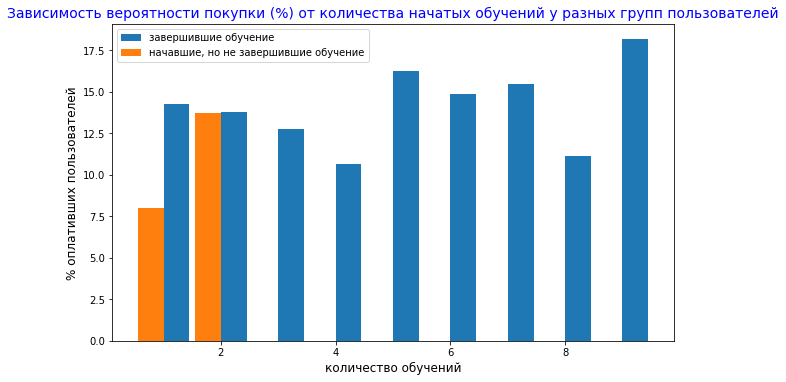

In [77]:
fig=plt.figure()
axes=fig.add_axes([0,0,1.3,1.1])
axes.bar(x=group_users_count_finished_tutoriale_purchase['tutorial_finished_count'], 
            height=persent_purchase_users_finished_tutorial, width=0.45, align='edge', label='завершившие обучение')

axes.set_title('Зависимость вероятности покупки (%) от количества начатых обучений у разных групп пользователей', \
               color='b', fontsize=14)
axes.set_ylabel('% оплативших пользователей', fontsize=12)
axes.set_xlabel('количество обучений', fontsize=12)

axes.bar(x=group_users_count_not_fin_but_started_purchase['tutorial_start_count'], 
            height=persent_users_not_finished_but_started_tutorial, width=-0.45, align='edge',\
         label='начавшие, но не завершившие обучение')
axes.legend(loc=2)
plt.show()

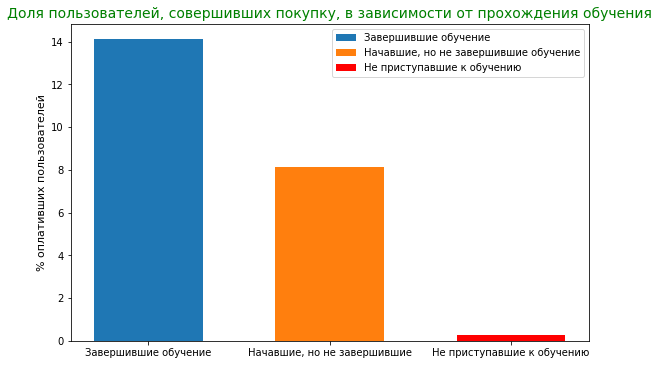

In [78]:

fig=plt.figure()
axes=fig.add_axes([0,0,1.2,1.1])

axes.bar(x='Завершившие обучение', height=persent_purchase_users_finished_tutorial_all, label='Завершившие обучение',\
        width=0.6)  
axes.bar(x='Начавшие, но не завершившие', height=persent_users_not_finished_but_started_tutorial_all,\
        label='Начавшие, но не завершившие обучение', width=0.6)
axes.bar(x='Не приступавшие к обучению', height=persent_users_not_started_tutorial_purchase,\
        label='Не приступавшие к обучению', width=0.6, color='red')
axes.set_title('Доля пользователей, совершивших покупку, в зависимости от прохождения обучения', color='g', \
               fontsize=14)
axes.set_ylabel('% оплативших пользователей', fontsize=11)
axes.legend(loc=1)
plt.show()

### ВЫВОДЫ по задаче №2:

- Однозначно можно сказать, что прохождение обучения влияет на оплату вопросов. Всего 0,27% пользователей, которые не       начинали обучение, оплатили вопросы. Процент оплаты вопросов пользователями, которые начинали обучение и не завершили       его (8,15%) или завершили обучение(14,12%) гораздо выше, чем у тех, кто не обучался. Так же можно отметить, что процент оплат у пользователей, завершивших обучение почти в 2 раза больше, чем у тех, кто начинал. и не завершил обучение.
    
- Процент оплат вопросов у группы пользователей, которые начинали и не завершили обучение почти в два раза выше у     пользователей, которые дважды начинали обучение (13,73%), чем у тех, кто начинал обучение один раз (7,97%).
    
- Прямую зависимость между вероятностью оплаты вопросов и количеством обучений у группы пользователей, завершивших обучение, проследить сложнее, т.к.:
          - у пользователей, которые начинали обучение от 1 до 4 раз с увеличением количества обучений наблюдается 
          снижение процента оплат (от 14,26% до 10,67%)
          - у пользователей, которые начинали обучение от 5 до 7 раз, процент оплат отличается незначительно (14,85% -               
          16,23%), при этом он выше, чем у тех, кто начинал обучение от 1 до 4 раз.
          - низкий процент оплат у пользователей, которые начинали обучение 8 раз (11.11%), он практически равен проценту             
          оплат вопросов пользователями, начинавшими обучение 4 раза.
          - самый высокий процент оплат вопросов у пользователей, которые начинали обучение 9 раз (18,18%).

### Задача №3
Как часто пользователи начинают обучение после того, как они выбрали уровень сложности? 

In [79]:
#Создадим датафрейм с пользователями, которые переходили к выбору уровня сложности
df_level_choice=total_events[total_events['event_type']=='level_choice']
df_level_choice

,event_id,event_type,selected_level,event_datetime,tutorial_id,user_id,purchase_id,amount
19,80327.0,level_choice,medium,2018-01-01 20:37:22,NaN,27835,NaN,NaN
23,80331.0,level_choice,hard,2018-01-01 22:37:50,NaN,27839,NaN,NaN
36,80344.0,level_choice,medium,2018-01-02 05:18:42,NaN,27840,NaN,NaN
38,80346.0,level_choice,hard,2018-01-02 06:19:18,NaN,27845,NaN,NaN
45,80353.0,level_choice,easy,2018-01-02 08:46:03,NaN,27842,NaN,NaN
...,...,...,...,...,...,...,...,...
66932,147240.0,level_choice,medium,2018-12-31 09:59:00,NaN,47732,NaN,NaN
66937,147245.0,level_choice,medium,2018-12-31 12:24:40,NaN,47747,NaN,NaN
66948,147256.0,level_choice,medium,2018-12-31 22:36:19,NaN,47753,NaN,NaN
66956,147265.0,level_choice,easy,2019-01-01 05:04:52,NaN,47755,NaN,NaN


In [80]:
#Посчитаем кол-во пользователей
users_level_choice=df_level_choice['user_id'].nunique()
users_level_choice

8342

In [81]:
#Оставим только необходимые столбцы, переименуем event_datetime в level_choice_datetime, что бы при объединении таблиц
# этот столбец был отдельным
df_level_choice=df_level_choice[['user_id', 'event_datetime']].rename(columns={'event_datetime': 'level_choice_datetime'})
df_level_choice.reset_index(drop=True)

,user_id,level_choice_datetime
0,27835,2018-01-01 20:37:22
1,27839,2018-01-01 22:37:50
2,27840,2018-01-02 05:18:42
3,27845,2018-01-02 06:19:18
4,27842,2018-01-02 08:46:03
...,...,...
8337,47732,2018-12-31 09:59:00
8338,47747,2018-12-31 12:24:40
8339,47753,2018-12-31 22:36:19
8340,47755,2019-01-01 05:04:52


In [82]:
# Создадим датафрейм с пользователями, которые начинали обучение
df_tutorial_start=total_events[total_events['event_type']=='tutorial_start']
df_tutorial_start

,event_id,event_type,selected_level,event_datetime,tutorial_id,user_id,purchase_id,amount
7,80315.0,tutorial_start,NaN,2018-01-01 14:54:40,31505.0,27836,NaN,NaN
8,80316.0,tutorial_start,NaN,2018-01-01 15:00:51,31506.0,27835,NaN,NaN
10,80318.0,tutorial_start,NaN,2018-01-01 15:40:43,31507.0,27836,NaN,NaN
12,80320.0,tutorial_start,NaN,2018-01-01 17:47:40,31508.0,27833,NaN,NaN
15,80323.0,tutorial_start,NaN,2018-01-01 19:11:36,31509.0,27839,NaN,NaN
...,...,...,...,...,...,...,...,...
66934,147242.0,tutorial_start,NaN,2018-12-31 10:21:11,49550.0,47747,NaN,NaN
66943,147251.0,tutorial_start,NaN,2018-12-31 19:38:14,49551.0,47751,NaN,NaN
66945,147253.0,tutorial_start,NaN,2018-12-31 20:54:56,49552.0,47753,NaN,NaN
66952,147260.0,tutorial_start,NaN,2019-01-01 00:08:14,49553.0,47755,NaN,NaN


In [83]:
#Оставим только необходимые столбцы, переименуем event_datetime в tutorial_start_datetime, что бы при объединении таблиц
# этот столбец был отдельным
df_tutorial_start=df_tutorial_start[['user_id', 'event_datetime']].\
rename(columns={'event_datetime':'tutorial_start_datetime'}).reset_index(drop=True)
df_tutorial_start

,user_id,tutorial_start_datetime
0,27836,2018-01-01 14:54:40
1,27835,2018-01-01 15:00:51
2,27836,2018-01-01 15:40:43
3,27833,2018-01-01 17:47:40
4,27839,2018-01-01 19:11:36
...,...,...
18045,47747,2018-12-31 10:21:11
18046,47751,2018-12-31 19:38:14
18047,47753,2018-12-31 20:54:56
18048,47755,2019-01-01 00:08:14


In [84]:
#Объединим два датафрейма
merge_df_lev_choice_tut_start=df_level_choice.merge(df_tutorial_start, on=['user_id'], how='inner')
merge_df_lev_choice_tut_start

,user_id,level_choice_datetime,tutorial_start_datetime
0,27835,2018-01-01 20:37:22,2018-01-01 15:00:51
1,27839,2018-01-01 22:37:50,2018-01-01 19:11:36
2,27840,2018-01-02 05:18:42,2018-01-02 02:07:07
3,27845,2018-01-02 06:19:18,2018-01-02 03:03:44
4,27845,2018-01-02 06:19:18,2018-01-02 07:08:00
...,...,...,...
12681,47732,2018-12-31 09:59:00,2018-12-31 07:14:38
12682,47747,2018-12-31 12:24:40,2018-12-31 10:21:11
12683,47753,2018-12-31 22:36:19,2018-12-31 20:54:56
12684,47755,2019-01-01 05:04:52,2019-01-01 00:08:14


In [85]:
#Добавим столбец Timedelta (разница во времени м/у выбором уровня сложности и стартом обучения)
merge_df_lev_choice_tut_start['timedelta']=merge_df_lev_choice_tut_start['tutorial_start_datetime']\
-merge_df_lev_choice_tut_start['level_choice_datetime']
merge_df_lev_choice_tut_start.reset_index(drop=True)

,user_id,level_choice_datetime,tutorial_start_datetime,timedelta
0,27835,2018-01-01 20:37:22,2018-01-01 15:00:51,-1 days +18:23:29
1,27839,2018-01-01 22:37:50,2018-01-01 19:11:36,-1 days +20:33:46
2,27840,2018-01-02 05:18:42,2018-01-02 02:07:07,-1 days +20:48:25
3,27845,2018-01-02 06:19:18,2018-01-02 03:03:44,-1 days +20:44:26
4,27845,2018-01-02 06:19:18,2018-01-02 07:08:00,0 days 00:48:42
...,...,...,...,...
12681,47732,2018-12-31 09:59:00,2018-12-31 07:14:38,-1 days +21:15:38
12682,47747,2018-12-31 12:24:40,2018-12-31 10:21:11,-1 days +21:56:31
12683,47753,2018-12-31 22:36:19,2018-12-31 20:54:56,-1 days +22:18:37
12684,47755,2019-01-01 05:04:52,2019-01-01 00:08:14,-1 days +19:03:22


In [86]:
#Оствим в столбце timedelta только значения>0 - именно оти обучения по времени проходили после выбора уровня сложности
tutorial_start_afte_level_choice=merge_df_lev_choice_tut_start[merge_df_lev_choice_tut_start['timedelta']>pd.Timedelta(0)]
tutorial_start_afte_level_choice

,user_id,level_choice_datetime,tutorial_start_datetime,timedelta
4,27845,2018-01-02 06:19:18,2018-01-02 07:08:00,0 days 00:48:42
6,27842,2018-01-02 08:46:03,2018-01-02 09:01:51,0 days 00:15:48
7,27842,2018-01-02 08:46:03,2018-01-02 18:08:01,0 days 09:21:58
13,27852,2018-01-02 18:39:44,2018-01-02 20:34:31,0 days 01:54:47
19,27862,2018-01-03 04:19:32,2018-01-03 11:17:41,0 days 06:58:09
...,...,...,...,...
12626,47635,2018-12-28 11:43:38,2018-12-28 17:28:42,0 days 05:45:04
12640,47657,2018-12-28 21:25:49,2018-12-28 21:44:13,0 days 00:18:24
12641,47657,2018-12-28 21:25:49,2018-12-28 21:53:06,0 days 00:27:17
12664,47711,2018-12-29 21:23:23,2018-12-29 22:50:57,0 days 01:27:34


In [87]:
#Посчитаем кол-во уникальных пользователей, которые приступали к обучению послу выбора уровня сложности
users_tutorial_start_afte_level_choice=tutorial_start_afte_level_choice['user_id'].nunique()
users_tutorial_start_afte_level_choice

1386

In [88]:
#Посчитаем % уникальных пользователей, которые приступали к обучению послу выбора уровня сложности
persent_tutorial_start_afte_level_choice=users_tutorial_start_afte_level_choice*100/users_level_choice
persent_tutorial_start_afte_level_choice

16.6147206904819

In [89]:
#Посчитаем кол-во пользователей, которые НЕ приступали к обучению послу выбора уровня сложности
users_not_tutorial_start_afte_level_choice=users_level_choice-users_tutorial_start_afte_level_choice
users_not_tutorial_start_afte_level_choice

6956

In [90]:
#Посчитаем % пользователей, которые НЕ приступали к обучению послу выбора уровня сложности
persent_not_tutorial_start_afte_level_choice=users_not_tutorial_start_afte_level_choice*100/users_level_choice
persent_not_tutorial_start_afte_level_choice

83.3852793095181

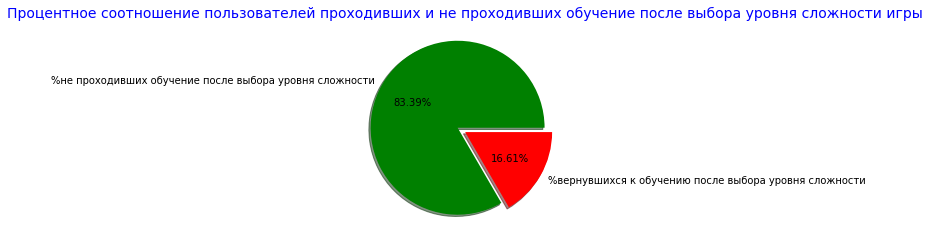

In [91]:
vals=['6956', '1386']
labels=['%не проходивших обучение после выбора уровня сложности',\
        '%вернувшихся к обучению после выбора уровня сложности']
explode=(0.1, 0)
fig, axes=plt.subplots()
axes.pie(vals, labels=labels, autopct='%1.2f%%', explode=explode, shadow=True, colors='green')
axes.set_title('Процентное соотношение пользователей проходивших и не проходивших обучение после \
выбора уровня сложности игры', fontsize=14, color='b')
plt.show()

### ВЫВОД по задаче №3:

-    Большинству пользователей (83.39%) работа с приложением понятна. Однако стоит обратить внимание на то, что 16.61% пользователей после выбора уровня сложности игры возвращаются к обучению. 

PS: Выполнение проекта вызвало сложности! Очень хотелось бы получить обратную связь: замечания<разбор ошибок . Спасибо!